In [1]:
# import packages

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

5


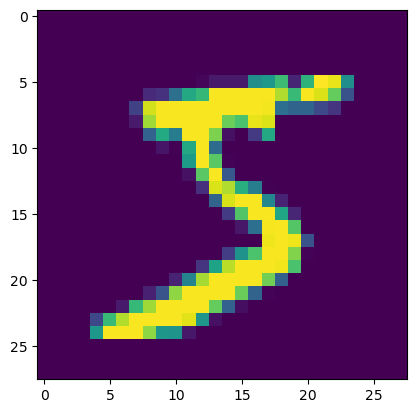

In [2]:
# importa data sets
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.imshow(x_train[0])
print(y_train[0])

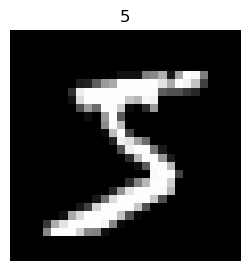

In [3]:
# let's make the images gray scale

plt.figure(figsize=(3, 3))
plt.imshow(x_train[0], cmap="gray")
plt.title(y_train[0])
plt.axis(False);

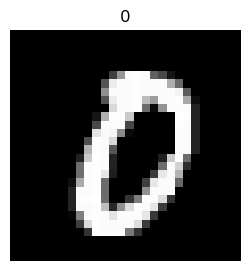

In [4]:
import random

random_idx = random.randint(0, len(x_train))

plt.figure(figsize = (3, 3))
plt.imshow(x_train[random_idx], cmap = "gray")

plt.title(y_train[random_idx])
plt.axis(False);

Data Preprocessing

In [5]:
# normalize data by adding a dimension to the array (this is for the CNN) and then dividing by 255 (the range for RGB values)
x_train.shape

(60000, 28, 28)

In [6]:
# add extra dimension
x_train = x_train.reshape(x_train.shape + (1,))
x_test = x_test.reshape(x_test.shape + (1,))

x_train.shape

(60000, 28, 28, 1)

In [7]:
# normalize so values are between 0 and 1
x_train = x_train/255
x_test = x_test/255

In [8]:
x_train = x_train.astype(np.float64)
x_test = x_test.astype(np.float64)

# Build Convolutional Neural Network

Now we build the CNN

In [9]:
model = tf.keras.Sequential()

Metal device set to: Apple M1 Pro


2023-01-18 15:00:11.674404: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-18 15:00:11.674754: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [10]:
model.add(tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu', input_shape = (28,28,1)))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 10)        100       
                                                                 
Total params: 100
Trainable params: 100
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.add(tf.keras.layers.Conv2D(10, 3, activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(10,3, activation = 'relu'))
model.add(tf.keras.layers.Conv2D(10,3, activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 10)        100       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 10)        910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 10)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 10)        910       
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 10)          910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 10)         0         
 2D)                                                    

In [13]:
import pandas as pd

In [23]:
# df_submission = pd.DataFrame([df_test.index+1,test_y],["ImageId","Label"]).transpose()
# df_submission.to_csv("submission.csv",index=False)

In [14]:
df_test = pd.read_csv('digit-recognizer/test.csv')

In [15]:
df_test.shape

(28000, 784)

In [16]:
df_train = pd.read_csv('digit-recognizer/train.csv')

In [17]:
df_train.shape

(42000, 785)

In [18]:
# compile model
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(), metrics = ['Accuracy'])

In [19]:
df_train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
y_train = df_train['label']

In [21]:
y_train

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [24]:
y_train = np.asarray(y_train)

In [25]:
y_train

array([1, 0, 1, ..., 7, 6, 9])

In [26]:
df_train = df_train.drop('label', axis = 1)

In [27]:
df_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
train_x = np.asarray(df_train.iloc[:,:]).reshape([-1, 28, 28, 1])
test_x = np.asarray(df_test.iloc[:,:]).reshape([-1,28,28,1])

In [29]:
train_x.shape

(42000, 28, 28, 1)

In [30]:
train_x.astype(np.float64)
test_x.astype(np.float64)

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [31]:
model.fit(train_x, y_train, epochs = 10)

Epoch 1/10


2023-01-18 15:05:02.674680: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-18 15:05:02.922850: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1313/1313 [==============================] - 12s 9ms/step - loss: 0.8617 - Accuracy: 0.8238
Epoch 2/10
1313/1313 [==============================] - 12s 9ms/step - loss: 0.1249 - Accuracy: 0.9610
Epoch 3/10
1313/1313 [==============================] - 12s 9ms/step - loss: 0.0914 - Accuracy: 0.9714
Epoch 4/10
1313/1313 [==============================] - 12s 9ms/step - loss: 0.0730 - Accuracy: 0.9773
Epoch 5/10
1313/1313 [==============================] - 12s 9ms/step - loss: 0.0623 - Accuracy: 0.9804
Epoch 6/10
1313/1313 [==============================] - 12s 9ms/step - loss: 0.0539 - Accuracy: 0.9833
Epoch 7/10
1313/1313 [==============================] - 12s 9ms/step - loss: 0.0499 - Accuracy: 0.9844
Epoch 8/10
1313/1313 [==============================] - 12s 9ms/step - loss: 0.0453 - Accuracy: 0.9856
Epoch 9/10
1313/1313 [==============================] - 12s 9ms/step - loss: 0.0423 - Accuracy: 0.9865
Epoch 10/10
1313/1313 [==============================] - 12s 9ms/step - loss: 0.0379

In [33]:
y_pred = model.predict(test_x)

 66/875 [=>............................] - ETA: 1s

2023-01-18 15:07:38.668642: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


875/875 [==============================] - 2s 2ms/step


In [35]:
y_pred = np.argmax(y_pred, axis = 1)

In [36]:
y_pred

array([2, 0, 9, ..., 3, 9, 2])

In [37]:
df_submission = pd.DataFrame([df_test.index+1,y_pred],["ImageId","Label"]).transpose()
df_submission.to_csv("submission.csv",index=False)